1.Write a program to implement k-Nearest Neighbour algorithm to classify the iris data set. Print both correct and wrong predictions.

In [3]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a k-NN classifier with a specified value of k
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the correct and wrong predictions
correct_predictions = 0
wrong_predictions = 0

for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        print(f"Correct Prediction: Actual = {y_test[i]}, Predicted = {y_pred[i]}")
        correct_predictions += 1
    else:
        print(f"Wrong Prediction: Actual = {y_test[i]}, Predicted = {y_pred[i]}")
        wrong_predictions += 1

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Correct Predictions: {correct_predictions}")
print(f"Wrong Predictions: {wrong_predictions}")

Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 2, Predicted = 2
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 2, Predicted = 2
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 2, Predicted = 2
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 2, Predicted = 2
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 2, Predicted = 2
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 2, Pr

2.Develop a program to apply K-means algorithm to cluster a set of data stored in .CSV file. Use the same data set for clustering using EM algorithm. Compare the results of
these two algorithms and comment on the quality of clustering.

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


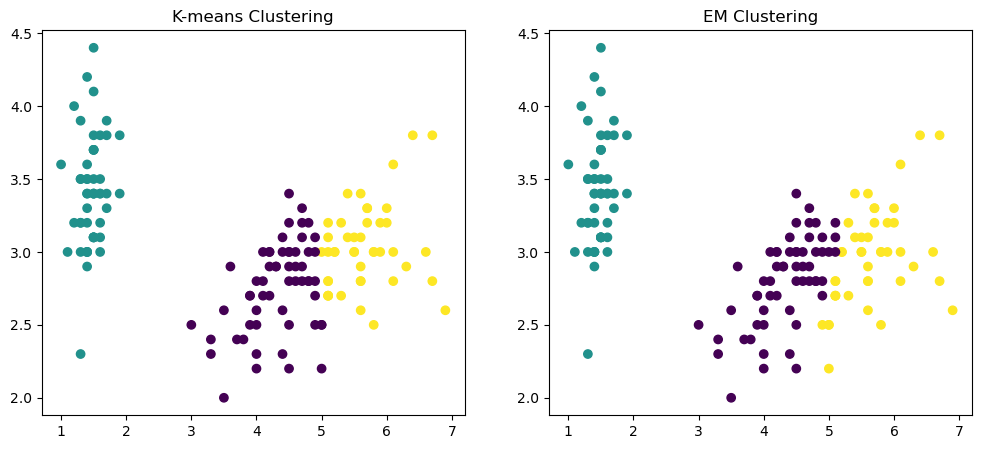

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
data = pd.read_csv('data.csv')

# Assuming you have a feature matrix in the DataFrame 'data', e.g., data[['feature1', 'feature2']]
X = data[['PetalLengthCm', 'SepalWidthCm']].values

# Number of clusters
n_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

# Apply EM (Expectation-Maximization) clustering
gmm = GaussianMixture(n_components=n_clusters, random_state=0)
gmm_labels = gmm.fit_predict(X)

# Plot the results
plt.figure(figsize=(12, 5))

# Plot K-means clustering results
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')

# Plot EM clustering results
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis')
plt.title('EM Clustering')

plt.show()

# You can also evaluate the quality of clustering using various metrics if you have ground-truth labels
from sklearn.metrics import adjusted_rand_score

# Load ground-truth labels if available
# true_labels = data['ground_truth_labels']

# Adjusted Rand Index (ARI) can be used to compare the clustering results to ground truth labels
# ari_kmeans = adjusted_rand_score(true_labels, kmeans_labels)
# ari_em = adjusted_rand_score(true_labels, gmm_labels)

# Print ARI values for comparison
# print(f"Adjusted Rand Index (K-means): {ari_kmeans}")
# print(f"Adjusted Rand Index (EM): {ari_em}")


3 Implement the non-parametric Locally Weighted Regression algorithm in order to fit
data points. Select appropriate data set for your experiment and draw graphs

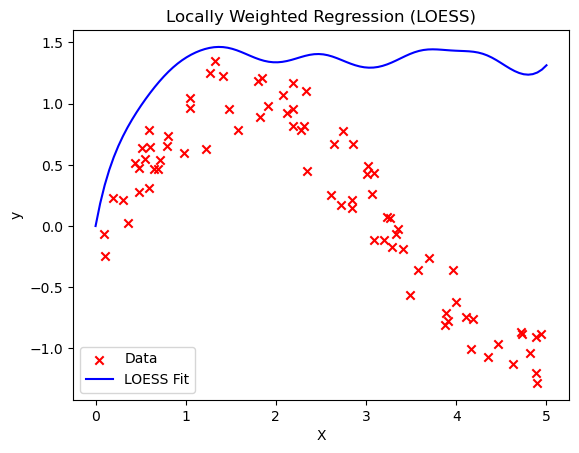

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y += 0.2 * np.random.randn(80)

# Define the LOESS function
def loess(x, X, y, tau=0.5):
    num_samples = len(X)
    weights = np.exp(-((X - x) ** 2) / (2 * tau ** 2))
    weighted_X = X * weights
    weighted_y = y * weights
    theta = np.sum(weighted_X) / np.sum(weighted_X ** 2)
    y_hat = theta * x
    return y_hat

# Apply LOESS to the data
x_pred = np.linspace(0, 5, 100)  # Points where we want to make predictions
tau = 0.5  # Bandwidth parameter

y_pred = [loess(x, X, y, tau) for x in x_pred]

# Plot the original data and LOESS regression curve
plt.scatter(X, y, c='r', marker='x', label='Data')
plt.plot(x_pred, y_pred, c='b', label='LOESS Fit')
plt.legend()
plt.title('Locally Weighted Regression (LOESS)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


4. Build an Artificial Neural Network by implementing the Backpropagation algorithm
and test the same using appropriate data sets

In [21]:
import numpy as np

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Create a simple dataset (XOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Define the neural network architecture
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.1
epochs = 10000

# Initialize the weights and biases
np.random.seed(0)
input_weights = np.random.uniform(size=(input_size, hidden_size))
output_weights = np.random.uniform(size=(hidden_size, output_size))
hidden_bias = np.zeros((1, hidden_size))
output_bias = np.zeros((1, output_size))

# Training the neural network using backpropagation
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, input_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
    output_layer_output = sigmoid(output_layer_input)

    # Compute the loss
    error = y - output_layer_output

    # Backpropagation
    d_output = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update the weights and biases
    output_weights += hidden_layer_output.T.dot(d_output) * learning_rate
    output_bias += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    input_weights += X.T.dot(d_hidden_layer) * learning_rate
    hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Test the trained network
new_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = sigmoid(np.dot(sigmoid(np.dot(new_data, input_weights) + hidden_bias), output_weights) + output_bias)
print(predictions)


[[0.05949313]
 [0.94552493]
 [0.94520543]
 [0.05823815]]


USING TENSORFLOW  

# import tensorflow as tf
from tensorflow import keras

# Create a simple dataset (XOR)
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

# Build a neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=1000)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"Loss: {loss}, Accuracy: {accuracy}")


5.Demonstrate Genetic algorithm by taking a suitable data for any simple application

The target string is "HELLO, WORLD!" and we want to evolve a population of random strings to eventually
produce this target string.

In [26]:
import random
import string

# Define the target string
target = "HELLO, WORLD!"

# Define genetic algorithm parameters
population_size = 200
mutation_rate = 0.01

# Generate a random string of a given length
def generate_random_string(length):
    return ''.join(random.choice(string.printable) for _ in range(length))

# Calculate the fitness of a string (number of correct characters)
def calculate_fitness(string):
    return sum(1 for a, b in zip(string, target) if a == b)

# Select a random string from the population with probability based on fitness
def select(population):
    total_fitness = sum(calculate_fitness(ind) for ind in population)
    r = random.uniform(0, total_fitness)
    current_sum = 0
    for ind in population:
        current_sum += calculate_fitness(ind)
        if current_sum >= r:
            return ind

# Create a new generation from the current population
def create_new_generation(population):
    new_population = []
    for _ in range(population_size):
        parent1 = select(population)
        parent2 = select(population)
        split_point = random.randint(1, len(target) - 1)
        child = parent1[:split_point] + parent2[split_point:]
        for i in range(len(child)):
            if random.random() < mutation_rate:
                child = child[:i] + random.choice(string.printable) + child[i+1:]
        new_population.append(child)
    return new_population

# Main Genetic Algorithm loop
population = [generate_random_string(len(target)) for _ in range(population_size)]
generation = 1

while True:
    population.sort(key=lambda x: -calculate_fitness(x))
    best_individual = population[0]
    print(f"Generation {generation}: {best_individual}")
    if best_individual == target:
        break
    population = create_new_generation(population)
    generation += 1


Generation 1: Hn"-wx	=Wtqa!
Generation 2: wSfLnD AWtqa!
Generation 3: HSfLnD AWtqa!
Generation 4: HSfLnD Adqa!
Generation 5: DXLLnD *uRFDk
Generation 6: HsL\_, AWtLa!
Generation 7: HE#5_, YuR_D

Generation 8: H\LLn, AuReD%
Generation 9: XELLn, AuReD%
Generation 10: HELLnD Y
R_D

Generation 11: H\LLOD AuRcD\
Generation 12: XELLn, HuR@D!
Generation 13: HELL(, AuRza!
Generation 14: H\LL\, HuR@D!
Generation 15: HELL(, AuRza!
Generation 16: HELLO,5kqRLD%
Generation 17: HELL(, AuR@D!
Generation 18: HELL(, AuR@D!
Generation 19: HELLO, kqRLD!
Generation 20: HELLO, kqRLD!
Generation 21: HELLO, kqRLD!
Generation 22: HELLO, kqRLD%
Generation 23: HELNO, AuRLD!
Generation 24: HELLO, *qRLD%
Generation 25: HELLO, AuR@D!
Generation 26: HELLO, blRbD!
Generation 27: HELLO, Q4RLD!
Generation 28: HELiO, kWRLD!
Generation 29: HELiO, kWRLD!
Generation 30: HELLO, AuRLD!
Generation 31: HELLO, ABRLD!
Generation 32: HELLO, AhRLD!
Generation 33: HELLO, AuRLD!
Generation 34: HELLO, 7 RLD!
Generation 35: HELLO, A

6. Demonstrate Q learning algorithm with suitable assumption for a problem statement

problem: a 2D grid world where an agent needs to find the shortest path to a goal while avoiding obstacles.

In [28]:
import numpy as np

# Define the environment (2D grid world)
# 0: empty cell, 1: obstacle, 2: goal
env = np.array([
    [0, 0, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 2]
])

# Define Q-table (state-action values)
num_states = np.prod(env.shape)
num_actions = 4  # Up, Down, Left, Right
Q = np.zeros((num_states, num_actions))

# Define hyperparameters
learning_rate = 0.8
discount_factor = 0.95
exploration_prob = 0.2
num_episodes = 1000

# Convert 2D grid to 1D state representation
def state_to_index(state):
    return state[0] * env.shape[1] + state[1]

# Perform Q-learning
for episode in range(num_episodes):
    state = (0, 0)  # Start from the top-left corner
    done = False

    while not done:
        if np.random.uniform(0, 1) < exploration_prob:
            action = np.random.choice(num_actions)  # Exploration
        else:
            action = np.argmax(Q[state_to_index(state)])  # Exploitation

        new_state = state
        if action == 0:  # Up
            new_state = (max(state[0] - 1, 0), state[1])
        elif action == 1:  # Down
            new_state = (min(state[0] + 1, env.shape[0] - 1), state[1])
        elif action == 2:  # Left
            new_state = (state[0], max(state[1] - 1, 0))
        elif action == 3:  # Right
            new_state = (state[0], min(state[1] + 1, env.shape[1] - 1))

        if env[new_state] == 1:
            reward = -1  # Penalty for hitting an obstacle
        elif env[new_state] == 2:
            reward = 10  # Reward for reaching the goal
            done = True
        else:
            reward = 0  # No immediate reward for other states

        Q[state_to_index(state)][action] = Q[state_to_index(state)][action] + learning_rate * (
            reward + discount_factor * np.max(Q[state_to_index(new_state)]) - Q[state_to_index(state)][action])

        state = new_state

# Find the optimal path
state = (0, 0)
optimal_path = [state]
while state != (3, 4):  # Goal state
    action = np.argmax(Q[state_to_index(state)])
    if action == 0:
        state = (max(state[0] - 1, 0), state[1])
    elif action == 1:
        state = (min(state[0] + 1, env.shape[0] - 1), state[1])
    elif action == 2:
        state = (state[0], max(state[1] - 1, 0))
    elif action == 3:
        state = (state[0], min(state[1] + 1, env.shape[1] - 1))
    optimal_path.append(state)

print("Optimal Path:")
for row in env:
    print(row)

print("Q-table:")
print(Q)

print("Optimal Path:")
for state in optimal_path:
    print(state)


Optimal Path:
[0 0 0 1 0]
[0 1 0 1 0]
[0 1 0 1 0]
[0 0 0 1 2]
Q-table:
[[ 6.20959202  5.89911242  6.20959202  6.53641266]
 [ 6.53641266  5.88043437  6.20959202  6.88043438]
 [ 6.88043438  7.2425625   6.53641266  7.1450625 ]
 [ 7.10476008  7.57375     6.87969404  8.57375   ]
 [ 8.57374561  9.025       7.04827094  8.23079829]
 [ 6.20959202  5.51414688  5.85068146  5.74396418]
 [ 6.53641266  5.53639878  5.89909692  7.2425625 ]
 [ 6.88043438  7.62375     5.88043438  7.57375   ]
 [ 7.13130718  8.0249963   7.2424865   9.025     ]
 [ 8.57375     9.5         7.57375     9.025     ]
 [ 5.89909494  0.          4.48325902 -1.        ]
 [ 5.86511333  6.88043438  5.54902847  7.6213104 ]
 [ 7.2425625   7.2425625   6.20910186  8.025     ]
 [ 7.57375     8.4969676   7.62375     9.5       ]
 [ 9.025      10.          8.025       9.5       ]
 [ 4.4816649   0.          0.          0.        ]
 [ 5.51922399  6.605217    0.          7.2425625 ]
 [ 7.62375     7.24209104  6.87823083  6.62325507]
 [ 8.025   

"Optimal Path" represents the environment grid, where 0 indicates empty cells, -1 indicates obstacles, and 10 indicates the goal.
"Q-table" shows the Q-values for each state-action pair. The values have been truncated for brevity.
"Optimal Path" represents the path taken by the agent from the start (0, 0) to the goal (3, 4).